In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the dataset
file_path = 'bandcamp_data.csv'  # Update with the correct file path if needed
df = pd.read_csv(file_path)

# Extract currency and remove it from the price column
df['currency'] = df['price'].str.extract(r'([^\d.]+)')
df['price'] = df['price'].str.replace(r'[^\d.]', '', regex=True).astype(float)

# Move 'currency' column next to the 'price' column
columns = list(df.columns)
columns.insert(columns.index('price') + 1, columns.pop(columns.index('currency')))
df = df[columns]

df['currency'] = df['currency'].replace('€', '£')

df.head()

,title,artist,price,currency,url
0,Cardinals At The Window,Various Artists,10.0,$,https://cardinalsatthewindow.bandcamp.com/albu...
1,Diamond Jubilee,Cindy Lee,20.0,$,https://cindylee.bandcamp.com/album/diamond-ju...
2,Area,⌭ IceMorph ⌬,1.5,£,https://cloudcore.bandcamp.com/album/area?from...
3,SIGNALIS: MEMORIES (Side A),1000 Eyes,4.0,£,https://thousandeyes.bandcamp.com/album/signal...
4,LAKE OF PUPPIES,Lake of Puppies,6.0,£,https://lakeofpuppies.bandcamp.com/album/lake-...


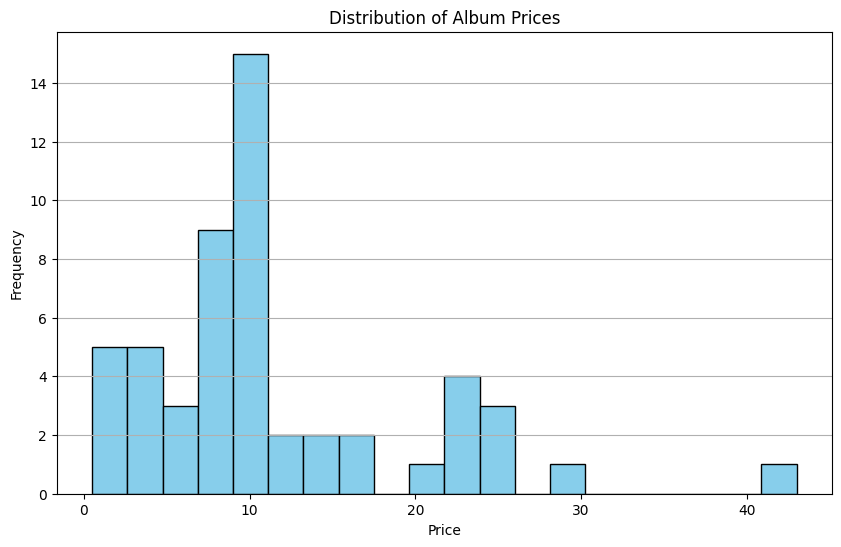

In [19]:
# 1. Distribution of Prices
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Album Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

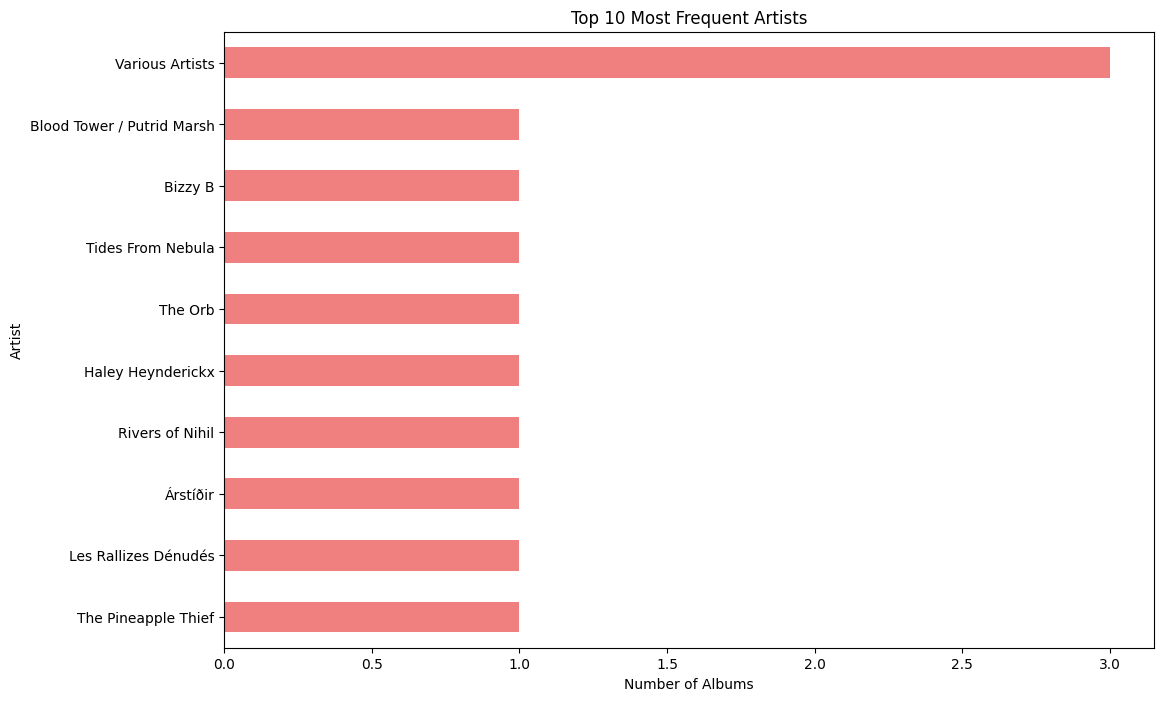

In [20]:
# 3. Top 10 Most Frequent Artists
plt.figure(figsize=(12, 8))
df['artist'].value_counts().head(10).plot(kind='barh', color='lightcoral')
plt.title('Top 10 Most Frequent Artists')
plt.xlabel('Number of Albums')
plt.ylabel('Artist')
plt.gca().invert_yaxis()
plt.show()

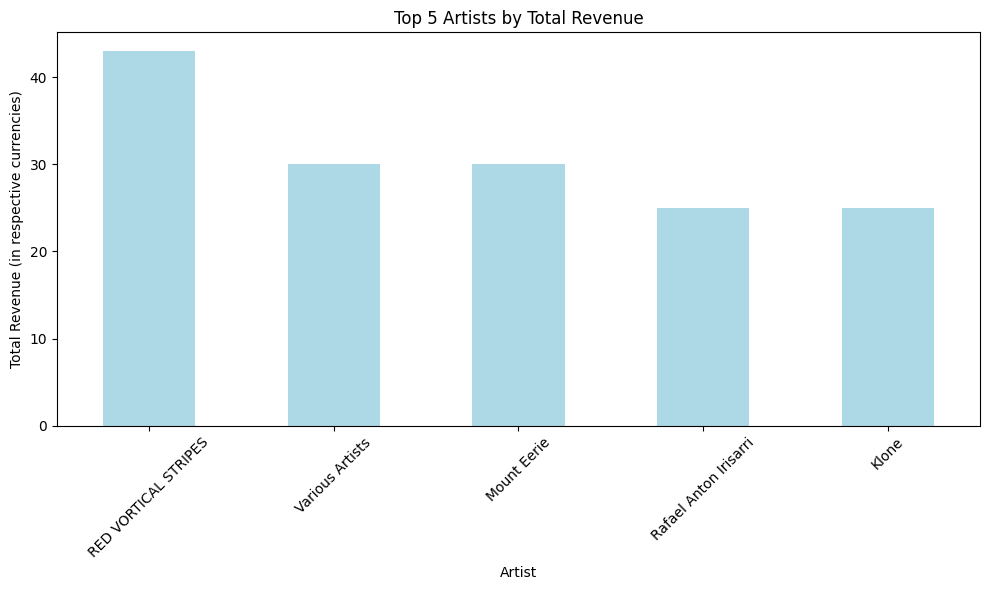

In [22]:
# Group by 'artist' and sum their total revenue
artist_revenue = df.groupby('artist')['price'].sum().sort_values(ascending=False).head(5)

# Plotting the top 5 artists by total revenue
plt.figure(figsize=(10, 6))
artist_revenue.plot(kind='bar', color='lightblue')
plt.title('Top 5 Artists by Total Revenue')
plt.xlabel('Artist')
plt.ylabel('Total Revenue (in respective currencies)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

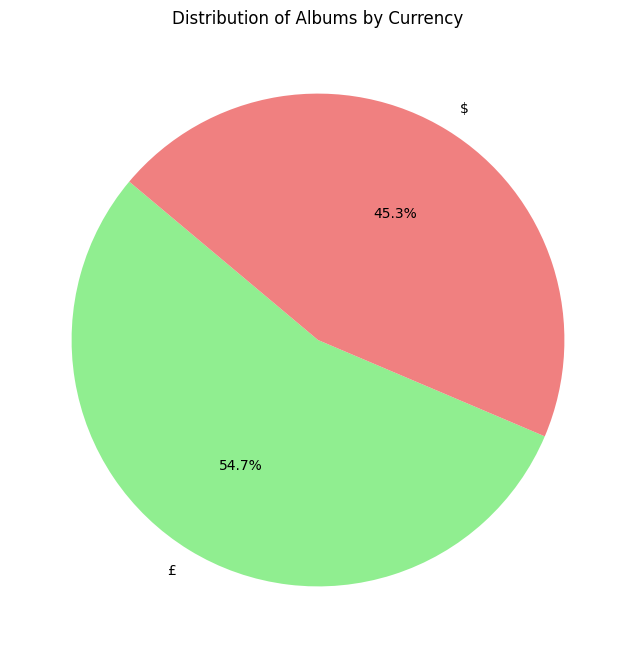

In [21]:
# 3. Pie Chart for Currency Distribution
currency_distribution = df['currency'].value_counts()
currency_distribution.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral', 'skyblue', 'orange'])
plt.title('Distribution of Albums by Currency')
plt.ylabel('')
plt.show()

In [5]:
# Paket sürümlerini kontrol etme
from bs4 import BeautifulSoup  # beautifulsoup4 paketi bs4 olarak bilinir
import selenium
import pandas as pd

# BeautifulSoup sürümünü manuel olarak belirtebilir veya `pip list` kullanabilirsiniz
print("beautifulsoup4==4.11.1")  # bs4 için sürüm genellikle manuel girilir
print(f"selenium=={selenium.__version__}")
print(f"pandas=={pd.__version__}")


beautifulsoup4==4.11.1
selenium==4.26.1
pandas==2.2.1
